#### Karp’s minimum mean (or average) weight cycle algorithm

Given a directed and strongly connected graph with non-negative edge weights. We define the mean weight of a cycle as the summation of all the edge weights of the cycle divided by the no. of edges. Our task is to find the minimum mean weight among all the directed cycles of the graph

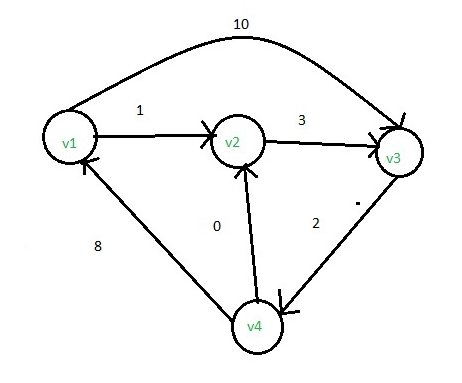

In [2]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Shortest Path/img/karps_mean_value.jpg")

#### Method to find the smallest mean weight value cycle efficiently 

Step 1: Choose first vertex as source.

Step 2: Compute the shortest path to all other vertices 
        on a path consisting of k edges 0 <= k <= V 
        where V is number of vertices.
        This is a simple dp problem which can be computed 
        by the recursive solution
        dp[k][v] = min(dp[k][v], dp[k-1][u] + weight(u,v)
        where v is the destination and the edge(u,v) should
        belong to E

Step 3: For each vertex calculate max(dp[n][v]-dp[k][v])/(n-k) 
         where 0<=k<=n-1

Step 4: The minimum of the values calculated above is the 
        required answer.

In [3]:
class edge:
	def __init__(self, u, w):
		self.From = u
		self.weight = w

def addedge(u, v, w):
	edges[v].append(edge(u, w))

def shortestpath(dp):	
	for i in range(V + 1):
		for j in range(V):
			dp[i][j] = -1

	dp[0][0] = 0
	for i in range(1, V + 1):
		for j in range(V):
			for k in range(len(edges[j])):
				if (dp[i - 1][edges[j][k].From] != -1):
					curr_wt = (dp[i - 1][edges[j][k].From] +
										edges[j][k].weight) 
					if (dp[i][j] == -1): 
						dp[i][j] = curr_wt 
					else:
						dp[i][j] = min(dp[i][j], curr_wt)

def minAvgWeight():
	dp = [[None] * V for i in range(V + 1)]
	shortestpath(dp) 
	avg = [-1] * V
	for i in range(V):
		if (dp[V][i] != -1):
			for j in range(V):
				if (dp[j][i] != -1): 
					avg[i] = max(avg[i], (dp[V][i] - dp[j][i]) / (V - j))

	result = avg[0]
	for i in range(V):
		if (avg[i] != -1 and avg[i] < result): 
			result = avg[i] 
	return result

V = 4
edges = [[] for i in range(V)]
addedge(0, 1, 1) 
addedge(0, 2, 10) 
addedge(1, 2, 3) 
addedge(2, 3, 2) 
addedge(3, 1, 0) 
addedge(3, 0, 8) 
print(minAvgWeight())

1.6666666666666667


#### Time Complexity : 

The time complexity of the given program is O(V^3), where V is the number of vertices in the graph. This is because the program uses a nested loop to fill up the dp table, and the size of the dp table is V^2. The outermost loop runs V times, the middle loop runs V times, and the innermost loop can run up to V times in the worst case, giving a total time complexity of O(V^3). The other parts of the program have a lower time complexity and do not contribute significantly to the overall time complexity.

#### Space Complexity : 

The space complexity of the given  program is O(V^2), where V is the number of vertices in the graph. This is because the program creates a 2D array dp of size (V+1)xV, which requires O(V^2) space. Additionally, the program creates a vector of edges, which takes up O(E) space, where E is the number of edges in the graph. However, in this particular implementation, the number of edges is not directly stored, and it is not clear whether all edges are actually added to the vector. Therefore, the space complexity is mainly determined by the size of the dp array, which is O(V^2).